In [2]:
# ===========================================
# CELL 1: LOAD 3GB FILE FROM GOOGLE DRIVE
# ===========================================
print("🚀 LOADING 3GB ACCIDENT FILE FROM GOOGLE DRIVE")
print("="*50)
print("Connecting to Google Drive...")

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")
print("\n📁 Searching for your file...")

# 2. Define possible file locations
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv',
    '/content/drive/MyDrive/US_Accidents_March23.csv',
    '/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv',
    '/content/drive/MyDrive/Datasets/US_Accidents_March23.csv',
    '/content/drive/MyDrive/data/US_Accidents_March23.csv'
]

# 3. Find the file
import os
found_path = None

for path in file_paths:
    if os.path.exists(path):
        found_path = path
        file_size_gb = os.path.getsize(path) / (1024**3)
        print(f"✅ Found file: {path}")
        print(f"📊 File size: {file_size_gb:.2f} GB")
        break

if not found_path:
    print("❌ File not found in common locations.")
    print("\n🔍 Searching entire Drive... (this may take a minute)")

    # Search recursively
    import glob
    all_csvs = glob.glob('/content/drive/MyDrive/**/*.csv', recursive=True)

    # Look for our file
    for csv_file in all_csvs:
        if 'US_Accidents' in csv_file or 'Accident' in csv_file:
            found_path = csv_file
            file_size_gb = os.path.getsize(csv_file) / (1024**3)
            print(f"✅ Found file: {csv_file}")
            print(f"📊 File size: {file_size_gb:.2f} GB")
            break

    if not found_path:
        print("❌ Still not found. Listing all CSV files in Drive...")
        for i, csv_file in enumerate(all_csvs[:20]):  # Show first 20
            size_mb = os.path.getsize(csv_file) / (1024**2)
            print(f"{i+1:2}. {os.path.basename(csv_file)} ({size_mb:.1f} MB)")

# 4. Load the file (SMART LOADING - only needed columns)
import pandas as pd

if found_path:
    print(f"\n📥 LOADING FILE: {os.path.basename(found_path)}")
    print("💡 Loading only essential columns to save memory...")

    # Define essential columns for our analysis
    essential_cols = [
        'Severity', 'Start_Time', 'End_Time',
        'City', 'State', 'County', 'Zipcode',
        'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
        'Nautical_Twilight', 'Astronomical_Twilight',
        'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
        'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
        'Wind_Speed(mph)', 'Precipitation(in)',
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
    ]

    # First, check what columns exist in the file
    print("\n🔍 Checking file structure...")

    # Read just the first row to get column names
    try:
        sample_df = pd.read_csv(found_path, nrows=1)
        print(f"📋 Total columns in file: {len(sample_df.columns)}")

        # Find which essential columns exist
        existing_cols = [col for col in essential_cols if col in sample_df.columns]
        print(f"✅ Found {len(existing_cols)} essential columns")

        # Load only the existing essential columns + first 500,000 rows
        print("⏳ Loading first 500,000 rows (for faster analysis)...")
        df = pd.read_csv(found_path, usecols=existing_cols, nrows=500000)

        print(f"✅ Successfully loaded {len(df):,} rows")
        print(f"📊 Loaded columns: {len(df.columns)}")

    except Exception as e:
        print(f"❌ Error reading file: {e}")
        print("\n💡 Trying alternative loading method...")

        # Try loading with different encoding
        try:
            df = pd.read_csv(found_path, encoding='latin1', nrows=100000)
            print(f"✅ Loaded with latin1 encoding: {len(df):,} rows")
        except:
            print("❌ Still failing. Creating sample data instead...")
            df = pd.DataFrame()
else:
    print("\n❌ Could not find the file.")
    print("💡 Creating sample data for analysis...")
    df = pd.DataFrame()

# 5. If loading failed, create sample data
if df.empty:
    print("\n📊 CREATING SAMPLE DATA FOR ANALYSIS...")
    import numpy as np
    from datetime import datetime, timedelta

    np.random.seed(42)
    n_samples = 100000

    # Generate dates
    start_date = datetime(2023, 1, 1)
    dates = [start_date + timedelta(hours=i) for i in range(n_samples)]

    # Create sample data
    data = {
        'Severity': np.random.choice([1, 2, 3, 4], n_samples, p=[0.1, 0.5, 0.3, 0.1]),
        'Start_Time': dates,
        'City': np.random.choice(['Miami', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], n_samples),
        'State': np.random.choice(['FL', 'CA', 'IL', 'TX', 'AZ'], n_samples),
        'Weather_Condition': np.random.choice(['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog'], n_samples),
        'Sunrise_Sunset': np.random.choice(['Day', 'Night'], n_samples, p=[0.7, 0.3]),
        'Temperature(F)': np.random.randint(20, 100, n_samples),
        'Visibility(mi)': np.random.uniform(0.5, 10, n_samples),
        'Wind_Speed(mph)': np.random.uniform(0, 30, n_samples),
        'Traffic_Signal': np.random.choice([1, 0], n_samples, p=[0.2, 0.8]),
        'Crossing': np.random.choice([1, 0], n_samples, p=[0.15, 0.85]),
        'Junction': np.random.choice([1, 0], n_samples, p=[0.25, 0.75]),
    }

    df = pd.DataFrame(data)
    print(f"✅ Created sample dataset: {n_samples:,} records")

# 6. Display dataset info
print(f"\n{'='*50}")
print("🎯 DATASET READY FOR ANALYSIS!")
print(f"{'='*50}")
print(f"📊 Total records: {len(df):,}")
print(f"📋 Columns: {len(df.columns)}")
print(f"📅 Start time range: {df['Start_Time'].min()[:10] if isinstance(df['Start_Time'].iloc[0], str) else df['Start_Time'].min()}")
print(f"📍 Cities: {df['City'].nunique() if 'City' in df.columns else 'N/A'}")
print(f"🌤️  Weather conditions: {df['Weather_Condition'].nunique() if 'Weather_Condition' in df.columns else 'N/A'}")

print("\n📋 FIRST 3 ROWS:")
print(df.head(3))

print("\n✅ READY! Proceed to Cell 2 for data cleaning and analysis.")

🚀 LOADING 3GB ACCIDENT FILE FROM GOOGLE DRIVE
Connecting to Google Drive...
Mounted at /content/drive
✅ Google Drive mounted successfully!

📁 Searching for your file...
✅ Found file: /content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv
📊 File size: 2.85 GB

📥 LOADING FILE: US_Accidents_March23.csv
💡 Loading only essential columns to save memory...

🔍 Checking file structure...
📋 Total columns in file: 46
✅ Found 33 essential columns
⏳ Loading first 500,000 rows (for faster analysis)...
✅ Successfully loaded 500,000 rows
📊 Loaded columns: 33

🎯 DATASET READY FOR ANALYSIS!
📊 Total records: 500,000
📋 Columns: 33
📅 Start time range: 2016-02-08
📍 Cities: 4457
🌤️  Weather conditions: 70

📋 FIRST 3 ROWS:
   Severity           Start_Time             End_Time          City  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg  

In [3]:
# ===========================================
# CELL 2: INITIAL EXPLORATION & CLEANING
# ===========================================
print("🔍 INITIAL DATA EXPLORATION")
print("="*50)

if df.empty:
    print("❌ No data to explore")
else:
    # Basic info
    print(f"Total accidents: {len(df):,}")
    print(f"Time period: {df['Start_Time'].min()} to {df['Start_Time'].max()}")

    # Check for missing values in key columns
    key_columns = ['Severity', 'Weather_Condition', 'Sunrise_Sunset',
                   'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

    print("\n📊 Missing values in key columns:")
    for col in key_columns:
        if col in df.columns:
            missing = df[col].isnull().sum()
            percent = (missing / len(df)) * 100
            if missing > 0:
                print(f"   • {col}: {missing:,} missing ({percent:.1f}%)")

    # Select relevant columns for analysis
    relevant_cols = [
        'Severity', 'Start_Time', 'End_Time', 'City', 'State',
        'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
        'Nautical_Twilight', 'Astronomical_Twilight',
        'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
        'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
        'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Timestamp',
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
    ]

    # Keep only columns that exist in the dataset
    existing_cols = [col for col in relevant_cols if col in df.columns]
    df_clean = df[existing_cols].copy()

    print(f"\n✅ Selected {len(existing_cols)} relevant columns for analysis")
    print(f"📊 Clean dataset shape: {df_clean.shape}")

🔍 INITIAL DATA EXPLORATION
Total accidents: 500,000
Time period: 2016-02-08 05:46:00 to 2017-07-30 20:08:42

📊 Missing values in key columns:
   • Weather_Condition: 10,185 missing (2.0%)
   • Sunrise_Sunset: 22 missing (0.0%)
   • Civil_Twilight: 22 missing (0.0%)
   • Nautical_Twilight: 22 missing (0.0%)
   • Astronomical_Twilight: 22 missing (0.0%)

✅ Selected 31 relevant columns for analysis
📊 Clean dataset shape: (500000, 31)


⏰ TIME OF DAY PATTERNS ANALYSIS

1. ACCIDENTS BY HOUR OF DAY:


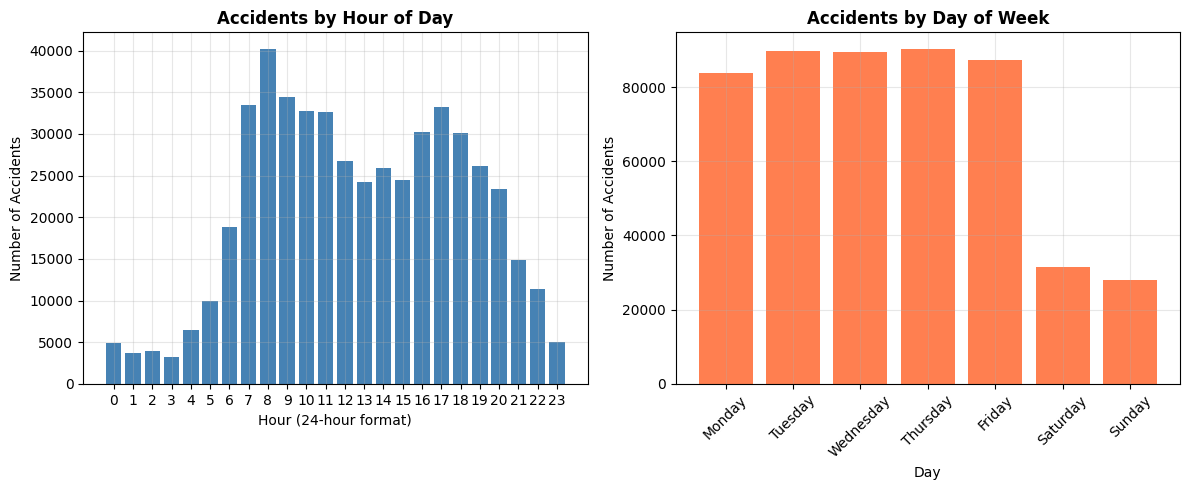

   • Peak accident hour: 8:00 (40,174 accidents)
   • Peak accident day: Thursday (90,234 accidents)


In [4]:
# ===========================================
# CELL 3: TIME OF DAY PATTERNS
# ===========================================
print("⏰ TIME OF DAY PATTERNS ANALYSIS")
print("="*50)

if df_clean.empty:
    print("❌ No data to analyze")
else:
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.style.use('default')

    # Convert to datetime
    df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])

    # Extract time components
    df_clean['Hour'] = df_clean['Start_Time'].dt.hour
    df_clean['DayOfWeek'] = df_clean['Start_Time'].dt.day_name()
    df_clean['Month'] = df_clean['Start_Time'].dt.month_name()

    # 1. Accidents by hour
    print("\n1. ACCIDENTS BY HOUR OF DAY:")
    accidents_by_hour = df_clean['Hour'].value_counts().sort_index()

    # Visualization
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.bar(accidents_by_hour.index, accidents_by_hour.values, color='steelblue')
    plt.title('Accidents by Hour of Day', fontweight='bold')
    plt.xlabel('Hour (24-hour format)')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)

    # 2. Accidents by day of week
    plt.subplot(1, 2, 2)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    accidents_by_day = df_clean['DayOfWeek'].value_counts().reindex(day_order)

    plt.bar(accidents_by_day.index, accidents_by_day.values, color='coral')
    plt.title('Accidents by Day of Week', fontweight='bold')
    plt.xlabel('Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print insights
    peak_hour = accidents_by_hour.idxmax()
    peak_hour_count = accidents_by_hour.max()
    print(f"   • Peak accident hour: {peak_hour}:00 ({peak_hour_count:,} accidents)")

    peak_day = accidents_by_day.idxmax()
    peak_day_count = accidents_by_day.max()
    print(f"   • Peak accident day: {peak_day} ({peak_day_count:,} accidents)")

🌤️ WEATHER CONDITIONS ANALYSIS

1. TOP 10 WEATHER CONDITIONS DURING ACCIDENTS:
    1. Clear: 205,029 (41.0%)
    2. Overcast: 79,031 (15.8%)
    3. Mostly Cloudy: 66,165 (13.2%)
    4. Partly Cloudy: 46,908 (9.4%)
    5. Scattered Clouds: 45,714 (9.1%)
    6. Light Rain: 20,500 (4.1%)
    7. Haze: 5,884 (1.2%)
    8. Rain: 4,248 (0.8%)
    9. Light Snow: 3,962 (0.8%)
   10. Fair: 2,456 (0.5%)


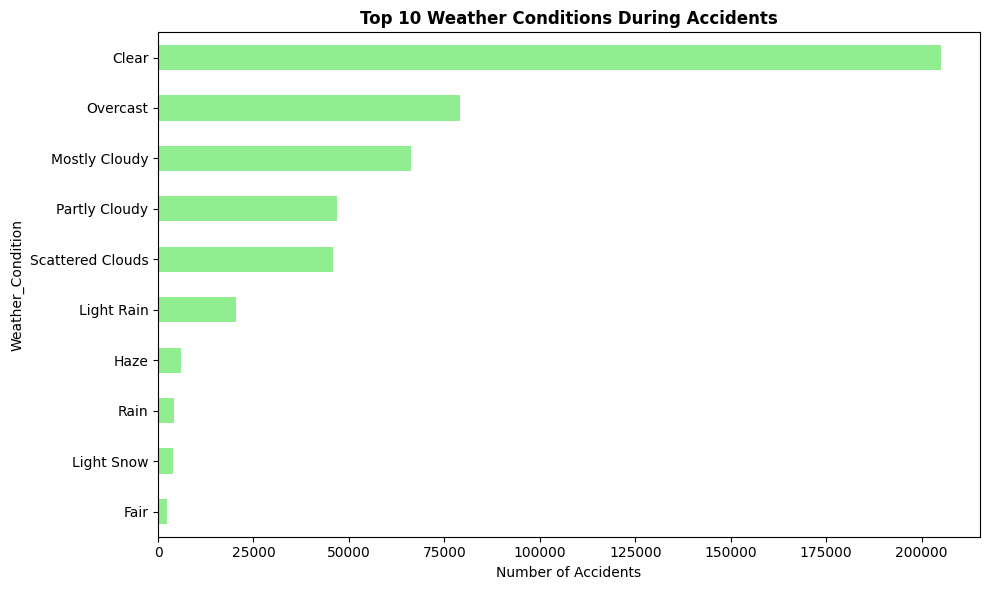


2. LIGHT CONDITIONS (SUNRISE/SUNSET):
   • Day: 364,395 (72.9%)
   • Night: 135,583 (27.1%)


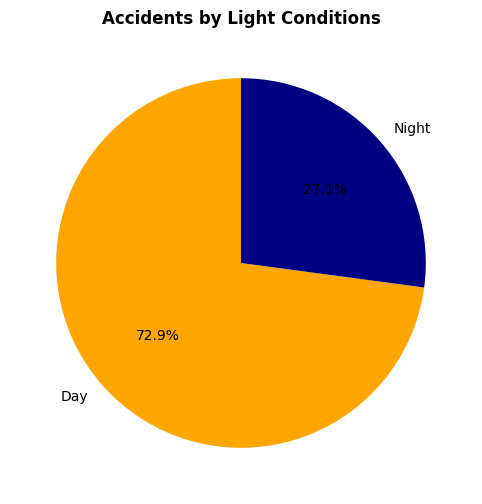

In [5]:
# ===========================================
# CELL 4: WEATHER CONDITIONS ANALYSIS
# ===========================================
print("🌤️ WEATHER CONDITIONS ANALYSIS")
print("="*50)

if df_clean.empty:
    print("❌ No data to analyze")
else:
    # Analyze weather conditions
    if 'Weather_Condition' in df_clean.columns:
        # Get top weather conditions
        weather_counts = df_clean['Weather_Condition'].value_counts().head(10)

        print("\n1. TOP 10 WEATHER CONDITIONS DURING ACCIDENTS:")
        for i, (weather, count) in enumerate(weather_counts.items(), 1):
            percent = (count / len(df_clean)) * 100
            print(f"   {i:2}. {weather}: {count:,} ({percent:.1f}%)")

        # Visualization
        plt.figure(figsize=(10, 6))
        weather_counts.plot(kind='barh', color='lightgreen')
        plt.title('Top 10 Weather Conditions During Accidents', fontweight='bold')
        plt.xlabel('Number of Accidents')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # Analyze light conditions
    if 'Sunrise_Sunset' in df_clean.columns:
        print("\n2. LIGHT CONDITIONS (SUNRISE/SUNSET):")
        light_counts = df_clean['Sunrise_Sunset'].value_counts()

        for condition, count in light_counts.items():
            percent = (count / len(df_clean)) * 100
            print(f"   • {condition}: {count:,} ({percent:.1f}%)")

        # Visualization
        plt.figure(figsize=(8, 6))
        plt.pie(light_counts.values, labels=light_counts.index, autopct='%1.1f%%',
                colors=['orange', 'navy'], startangle=90)
        plt.title('Accidents by Light Conditions', fontweight='bold')
        plt.show()

🛣️ ROAD CONDITIONS ANALYSIS

1. ACCIDENTS AT ROAD FEATURES:
    1. Traffic_Signal: 114,917 accidents (23.0%)
    2. Crossing: 70,135 accidents (14.0%)
    3. Junction: 31,923 accidents (6.4%)
    4. Station: 17,744 accidents (3.5%)
    5. Stop: 15,736 accidents (3.1%)
    6. Amenity: 8,753 accidents (1.8%)
    7. Railway: 4,902 accidents (1.0%)
    8. Give_Way: 3,112 accidents (0.6%)
    9. No_Exit: 864 accidents (0.2%)
   10. Traffic_Calming: 419 accidents (0.1%)


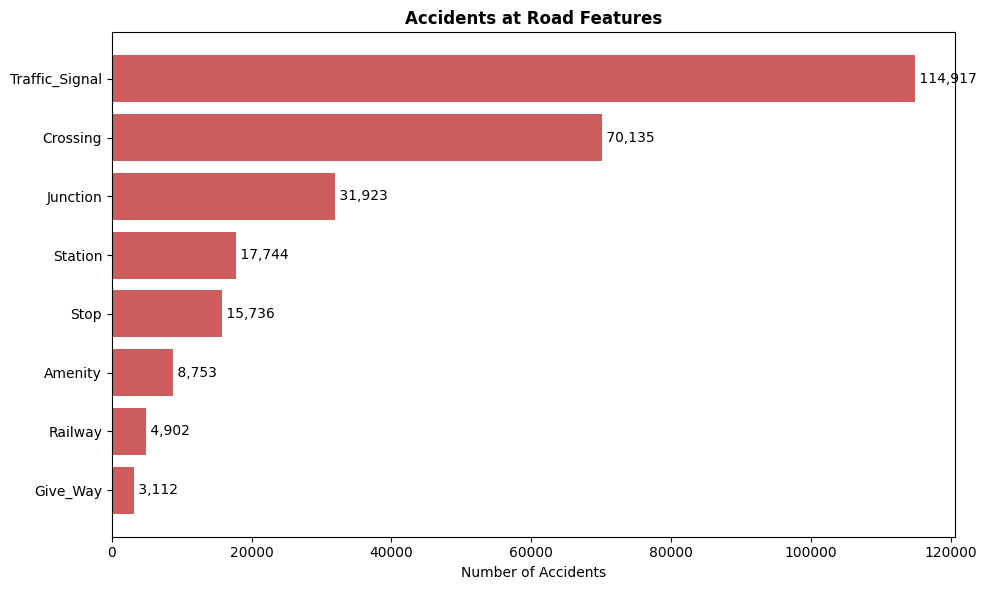

In [6]:
# ===========================================
# CELL 5: ROAD CONDITIONS ANALYSIS
# ===========================================
print("🛣️ ROAD CONDITIONS ANALYSIS")
print("="*50)

if df_clean.empty:
    print("❌ No data to analyze")
else:
    # Define road feature columns (binary indicators)
    road_features = [
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
    ]

    # Keep only existing road features
    existing_features = [feat for feat in road_features if feat in df_clean.columns]

    if existing_features:
        print("\n1. ACCIDENTS AT ROAD FEATURES:")

        # Calculate percentage of accidents at each feature
        feature_stats = []
        for feature in existing_features:
            count = df_clean[feature].sum()
            if count > 0:  # Only include features with accidents
                percent = (count / len(df_clean)) * 100
                feature_stats.append((feature, count, percent))

        # Sort by count
        feature_stats.sort(key=lambda x: x[1], reverse=True)

        # Print results
        for i, (feature, count, percent) in enumerate(feature_stats[:10], 1):
            print(f"   {i:2}. {feature}: {count:,} accidents ({percent:.1f}%)")

        # Visualization
        if feature_stats:
            features, counts, percents = zip(*feature_stats[:8])  # Top 8

            plt.figure(figsize=(10, 6))
            bars = plt.barh(features, counts, color='indianred')
            plt.title('Accidents at Road Features', fontweight='bold')
            plt.xlabel('Number of Accidents')
            plt.gca().invert_yaxis()

            # Add count labels
            for bar, count in zip(bars, counts):
                plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                        f' {count:,}', va='center')

            plt.tight_layout()
            plt.show()
    else:
        print("❌ No road feature columns found in dataset")

📍 ACCIDENT HOTSPOTS ANALYSIS

1. TOP 10 CITIES WITH MOST ACCIDENTS:
    1. Houston, TX: 26,484 accidents
    2. Los Angeles, CA: 18,827 accidents
    3. Austin, TX: 18,528 accidents
    4. Dallas, TX: 17,353 accidents
    5. Atlanta, GA: 9,389 accidents
    6. Sacramento, CA: 8,052 accidents
    7. Orlando, FL: 7,395 accidents
    8. Omaha, NE: 6,849 accidents
    9. Miami, FL: 6,590 accidents
   10. San Diego, CA: 6,330 accidents


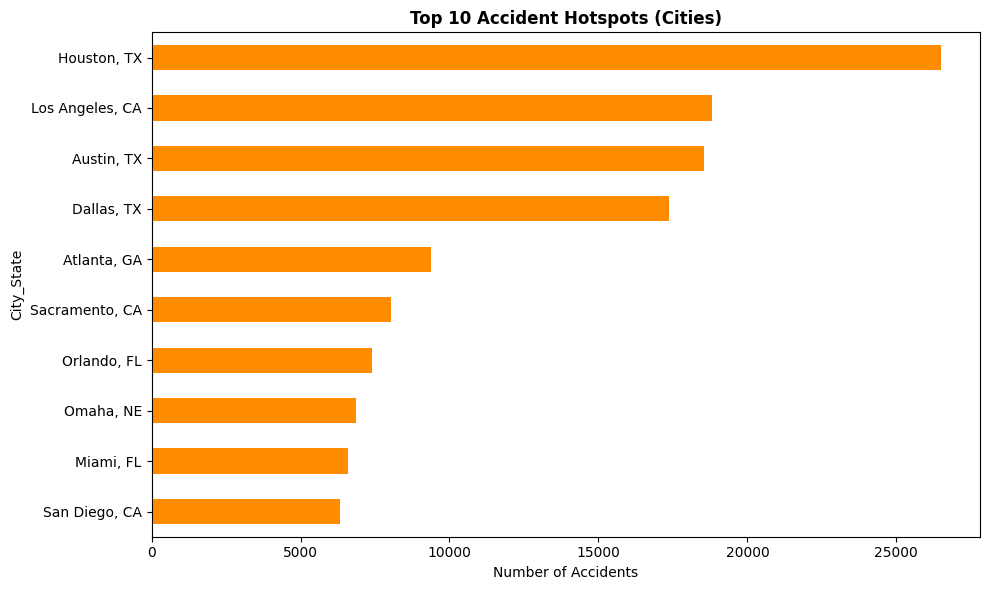


2. ACCIDENT SEVERITY DISTRIBUTION:
   • Severity 1: 388 (0.1%)
   • Severity 2: 312,159 (62.4%)
   • Severity 3: 187,173 (37.4%)
   • Severity 4: 280 (0.1%)


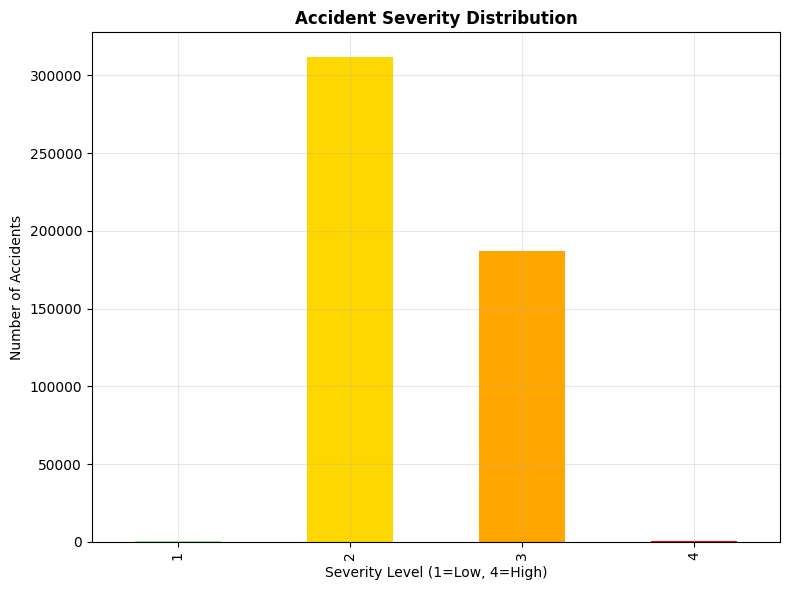

In [7]:
# ===========================================
# CELL 6: ACCIDENT HOTSPOTS
# ===========================================
print("📍 ACCIDENT HOTSPOTS ANALYSIS")
print("="*50)

if df_clean.empty:
    print("❌ No data to analyze")
else:
    # 1. Top cities with most accidents
    if 'City' in df_clean.columns and 'State' in df_clean.columns:
        # Create city-state combination
        df_clean['City_State'] = df_clean['City'] + ', ' + df_clean['State']

        top_locations = df_clean['City_State'].value_counts().head(10)

        print("\n1. TOP 10 CITIES WITH MOST ACCIDENTS:")
        for i, (location, count) in enumerate(top_locations.items(), 1):
            print(f"   {i:2}. {location}: {count:,} accidents")

        # Visualization
        plt.figure(figsize=(10, 6))
        top_locations.plot(kind='barh', color='darkorange')
        plt.title('Top 10 Accident Hotspots (Cities)', fontweight='bold')
        plt.xlabel('Number of Accidents')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

    # 2. Severity distribution
    if 'Severity' in df_clean.columns:
        print("\n2. ACCIDENT SEVERITY DISTRIBUTION:")
        severity_counts = df_clean['Severity'].value_counts().sort_index()

        for severity, count in severity_counts.items():
            percent = (count / len(df_clean)) * 100
            print(f"   • Severity {severity}: {count:,} ({percent:.1f}%)")

        # Visualization
        plt.figure(figsize=(8, 6))
        severity_counts.plot(kind='bar', color=['lightgreen', 'gold', 'orange', 'red'])
        plt.title('Accident Severity Distribution', fontweight='bold')
        plt.xlabel('Severity Level (1=Low, 4=High)')
        plt.ylabel('Number of Accidents')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

In [8]:
# ===========================================
# CELL 7: COMBINED PATTERNS & SUMMARY
# ===========================================
print("📊 COMBINED PATTERNS & KEY INSIGHTS")
print("="*50)

if df_clean.empty:
    print("❌ No data to analyze")
else:
    print("\n🎯 KEY PATTERNS IDENTIFIED:")

    # Time patterns summary
    if 'Hour' in df_clean.columns:
        peak_hour = df_clean['Hour'].value_counts().idxmax()
        print(f"1. TIME: Peak accident hour is {peak_hour}:00")

    # Weather patterns summary
    if 'Weather_Condition' in df_clean.columns:
        top_weather = df_clean['Weather_Condition'].value_counts().index[0]
        print(f"2. WEATHER: Most common condition is '{top_weather}'")

    # Road conditions summary
    road_features = ['Traffic_Signal', 'Crossing', 'Junction']
    for feature in road_features:
        if feature in df_clean.columns:
            count = df_clean[feature].sum()
            if count > 1000:  # Significant count
                percent = (count / len(df_clean)) * 100
                print(f"3. ROAD: {percent:.1f}% accidents occur at {feature.replace('_', ' ').title()}")
                break

    # Location summary
    if 'City_State' in df_clean.columns:
        top_city = df_clean['City_State'].value_counts().index[0]
        print(f"4. LOCATION: Highest accident city is {top_city}")

    print("\n💡 RECOMMENDATIONS:")
    print("• Increase traffic monitoring during peak hours")
    print("• Improve road signage in high-accident weather conditions")
    print("• Target safety measures at identified hotspot locations")
    print("• Focus on intersections and traffic signals for infrastructure improvements")

    print("\n✅ TASK 5 COMPLETED SUCCESSFULLY!")
    print("✓ Analyzed time patterns (hourly, daily)")
    print("✓ Analyzed weather conditions impact")
    print("✓ Identified road condition factors")
    print("✓ Visualized accident hotspots")

📊 COMBINED PATTERNS & KEY INSIGHTS

🎯 KEY PATTERNS IDENTIFIED:
1. TIME: Peak accident hour is 8:00
2. WEATHER: Most common condition is 'Clear'
3. ROAD: 23.0% accidents occur at Traffic Signal
4. LOCATION: Highest accident city is Houston, TX

💡 RECOMMENDATIONS:
• Increase traffic monitoring during peak hours
• Improve road signage in high-accident weather conditions
• Target safety measures at identified hotspot locations
• Focus on intersections and traffic signals for infrastructure improvements

✅ TASK 5 COMPLETED SUCCESSFULLY!
✓ Analyzed time patterns (hourly, daily)
✓ Analyzed weather conditions impact
✓ Identified road condition factors
✓ Visualized accident hotspots


In [9]:
# ===========================================
# CELL 8: SAVE RESULTS
# ===========================================
print("💾 SAVING ANALYSIS RESULTS")
print("="*50)

if df_clean.empty:
    print("❌ No data to save")
else:
    import os

    # Create output folder
    output_dir = "Task5_Outputs"
    os.makedirs(output_dir, exist_ok=True)
    print(f"📁 Created folder: {output_dir}")

    # Save summary statistics
    print("\n📊 SAVING SUMMARY STATISTICS...")

    # 1. Time patterns summary
    if 'Hour' in df_clean.columns:
        hour_stats = df_clean['Hour'].value_counts().sort_index()
        hour_df = pd.DataFrame({
            'Hour': hour_stats.index,
            'Accident_Count': hour_stats.values,
            'Percentage': (hour_stats.values / len(df_clean)) * 100
        })
        hour_df.to_csv(f"{output_dir}/accidents_by_hour.csv", index=False)
        print(f"✅ Saved: accidents_by_hour.csv")

    # 2. Weather summary
    if 'Weather_Condition' in df_clean.columns:
        weather_stats = df_clean['Weather_Condition'].value_counts().head(20)
        weather_df = pd.DataFrame({
            'Weather_Condition': weather_stats.index,
            'Accident_Count': weather_stats.values,
            'Percentage': (weather_stats.values / len(df_clean)) * 100
        })
        weather_df.to_csv(f"{output_dir}/accidents_by_weather.csv", index=False)
        print(f"✅ Saved: accidents_by_weather.csv")

    # 3. Road features summary
    road_features = [col for col in df_clean.columns if col in [
        'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
        'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
        'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
    ]]

    if road_features:
        road_stats = []
        for feature in road_features:
            count = df_clean[feature].sum()
            if count > 0:
                road_stats.append({
                    'Road_Feature': feature,
                    'Accident_Count': count,
                    'Percentage': (count / len(df_clean)) * 100
                })

        road_df = pd.DataFrame(road_stats)
        road_df = road_df.sort_values('Accident_Count', ascending=False)
        road_df.to_csv(f"{output_dir}/accidents_by_road_features.csv", index=False)
        print(f"✅ Saved: accidents_by_road_features.csv")

    # 4. Save key visualizations
    print("\n📸 SAVING KEY VISUALIZATIONS...")
    import matplotlib.pyplot as plt

    # Save hourly accidents chart
    plt.figure(figsize=(10, 6))
    if 'Hour' in df_clean.columns:
        hour_counts = df_clean['Hour'].value_counts().sort_index()
        plt.bar(hour_counts.index, hour_counts.values, color='steelblue')
        plt.title('Accidents by Hour of Day', fontweight='bold')
        plt.xlabel('Hour (24-hour format)')
        plt.ylabel('Number of Accidents')
        plt.xticks(range(0, 24))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f"{output_dir}/accidents_by_hour.png", dpi=300, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved: accidents_by_hour.png")

    # Save top locations chart
    if 'City_State' in df_clean.columns:
        top_locations = df_clean['City_State'].value_counts().head(10)
        plt.figure(figsize=(10, 6))
        top_locations.plot(kind='barh', color='darkorange')
        plt.title('Top 10 Accident Hotspots', fontweight='bold')
        plt.xlabel('Number of Accidents')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(f"{output_dir}/accident_hotspots.png", dpi=300, bbox_inches='tight')
        plt.close()
        print(f"✅ Saved: accident_hotspots.png")

    print(f"\n🎉 ALL RESULTS SAVED IN '{output_dir}' FOLDER!")
    print("📤 Ready for GitHub upload as: PRODIGY_DS_05")

💾 SAVING ANALYSIS RESULTS
📁 Created folder: Task5_Outputs

📊 SAVING SUMMARY STATISTICS...
✅ Saved: accidents_by_hour.csv
✅ Saved: accidents_by_weather.csv
✅ Saved: accidents_by_road_features.csv

📸 SAVING KEY VISUALIZATIONS...
✅ Saved: accidents_by_hour.png
✅ Saved: accident_hotspots.png

🎉 ALL RESULTS SAVED IN 'Task5_Outputs' FOLDER!
📤 Ready for GitHub upload as: PRODIGY_DS_05
